In [3]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as pt
import torch.nn as nn
import torch.nn.functional as f
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
#data imports
full_df = pd.read_csv('../data/wine+quality/winequality-white.csv', delimiter=";")


data = full_df.drop('quality', axis=1)

answers = full_df["quality"]

X = data.values
Y = answers.values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=69)

X_train = pt.FloatTensor(X_train)
X_test = pt.FloatTensor(X_test)
Y_test = pt.LongTensor(Y_test)
Y_train = pt.LongTensor(Y_train)

full_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
#nn class

class white_wine_Model(nn.Module):
    def __init__(self, in_features=11, h1 = 20, h2 = 20, h3=20, out_features = 10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3, out_features)
        
    def forward(self,x):
        x= f.relu(self.fc1(x))
        x= f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x = self.out(x)
        return x
        

In [12]:
pt.manual_seed(69)

model = white_wine_Model()

criterion = nn.CrossEntropyLoss()
optimizer = pt.optim.AdamW(model.parameters(), lr=0.01)

In [13]:
#run iterations and track error
iterations = 100
losses = []
for i in range(iterations):
  Y_pred = model.forward(X_train) #send forward training data

#   measure error, will be high originally, test results against correct answers based on criterion method we chose
  loss = criterion(Y_pred, Y_train)

  #add to our losses to track improvement
  losses.append(loss.detach().numpy())

  #print loss every ten iterations to check progress
  if i%10 == 0:
    print(f'iteration:{i}, loss:{loss.item()}')

  #back propagation: as you get error rates you feed it back into the model for the next iteration so that weights can be adjusted accordingly to fine tune
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

iteration:0, loss:3.1706979274749756
iteration:10, loss:1.3865268230438232
iteration:20, loss:1.2913429737091064
iteration:30, loss:1.281231164932251
iteration:40, loss:1.268096685409546
iteration:50, loss:1.2480159997940063
iteration:60, loss:1.2219035625457764
iteration:70, loss:1.2161616086959839
iteration:80, loss:1.1814996004104614
iteration:90, loss:1.1635022163391113


Text(0.5, 1.0, 'loss vs iterations in model training')

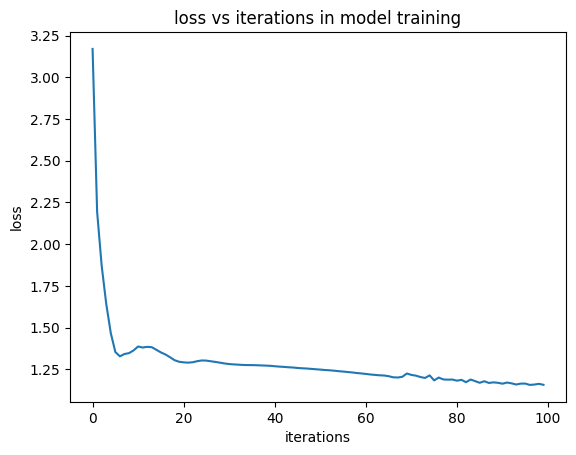

In [14]:
plt.plot(range(iterations), losses)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("loss vs iterations in model training")

In [15]:
#test our results with test data
correct = 0
with pt.no_grad():
    for i, data in enumerate(X_test):
        Y_pred = model(data)
        if Y_pred.argmax().item() == Y_test[i]:
            correct +=1
            
print(f"We got {correct} out of {len(Y_test)} correct!")

We got 478 out of 980 correct!


In [24]:
#nn class

class red_win_model(nn.Module):
    def __init__(self, in_features=11, h1 = 20, h2 = 20, h3=20, out_features = 10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3, out_features)
        
    def forward(self,x):
        x= f.relu(self.fc1(x))
        x= f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x = self.out(x)
        return x
    
pt.manual_seed(69)

model = white_wine_Model()

criterion = nn.CrossEntropyLoss()
optimizer = pt.optim.AdamW(model.parameters(), lr=0.01)
    
    
        

In [25]:
full_df = pd.read_csv('../data/wine+quality/winequality-red.csv', delimiter=";")


data = full_df.drop('quality', axis=1)

answers = full_df["quality"]

X = data.values
Y = answers.values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=69)

X_train = pt.FloatTensor(X_train)
X_test = pt.FloatTensor(X_test)
Y_test = pt.LongTensor(Y_test)
Y_train = pt.LongTensor(Y_train)


In [26]:
iterations = 10000
losses = []
for i in range(iterations):
  Y_pred = model.forward(X_train) #send forward training data

#   measure error, will be high originally, test results against correct answers based on criterion method we chose
  loss = criterion(Y_pred, Y_train)

  #add to our losses to track improvement
  losses.append(loss.detach().numpy())

  #print loss every ten iterations to check progress
  if i%10 == 0:
    print(f'iteration:{i}, loss:{loss.item()}')

  #back propagation: as you get error rates you feed it back into the model for the next iteration so that weights can be adjusted accordingly to fine tune
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

iteration:0, loss:2.708493709564209
iteration:10, loss:1.211714506149292
iteration:20, loss:1.1528007984161377
iteration:30, loss:1.1320759057998657
iteration:40, loss:1.1167417764663696
iteration:50, loss:1.1004223823547363
iteration:60, loss:1.0815458297729492
iteration:70, loss:1.054386854171753
iteration:80, loss:1.018949031829834
iteration:90, loss:1.013406753540039
iteration:100, loss:0.9733741879463196
iteration:110, loss:0.9599313735961914
iteration:120, loss:0.9513189792633057
iteration:130, loss:0.9347820281982422
iteration:140, loss:0.9359098672866821
iteration:150, loss:0.9255297780036926
iteration:160, loss:0.9175096750259399
iteration:170, loss:0.9126749634742737
iteration:180, loss:0.909338116645813
iteration:190, loss:0.9109735488891602
iteration:200, loss:0.9070901870727539
iteration:210, loss:0.8997880220413208
iteration:220, loss:0.9211755990982056
iteration:230, loss:0.8984638452529907
iteration:240, loss:0.8941263556480408
iteration:250, loss:0.8917823433876038
ite

Text(0.5, 1.0, 'loss vs iterations in model training')

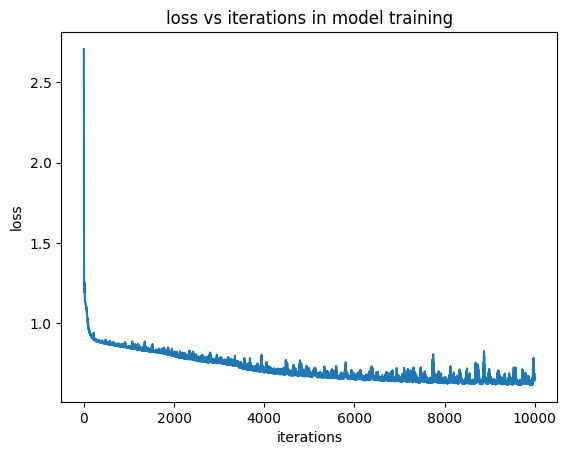

In [27]:
plt.plot(range(iterations), losses)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("loss vs iterations in model training")

In [28]:
correct = 0
with pt.no_grad():
    for i, data in enumerate(X_test):
        Y_pred = model(data)
        if Y_pred.argmax().item() == Y_test[i]:
            correct +=1
            
print(f"We got {correct} out of {len(Y_test)} correct!")

We got 182 out of 320 correct!
